In [1]:
%load_ext autoreload 
%autoreload 2 
from params import *
import pandas as pd 
import numpy as np 
import os 
from modelling import *

# task 1

In [2]:
data_class  = DataClass(use_prediction= True,use_enhanced=False,custom=True)
data_class.create_dataset()
# data = data_class.data_model

# data_unbalanced = data_class.create_unbalanced_dataset(data)
# data_unbalanced['label'].value_counts() / data_unbalanced.shape[0]
# # Define parameter
modelling_data = DataModel(data = data_class.data_model,
                           custom_test_index=data_class.enhanced_index,
                           custom=True)
modelling_data.create_padding()
modelling_data.x_test

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape of training tensor:  (205, 50)
Shape of testing tensor:  (27, 50)


18                               ch ang
24                      patron herandre
25                        ep oarguerite
34                            ep vigmie
65                             angloise
69                        metages feris
82                              jregues
104                     patron gilbeuse
121    fr re labrye manoeuvre branistau
126                       fils mamiolas
132                       p f gadeleine
138                          ctiennette
142                              ch aup
147      fin lansait enttinateur clause
159                  ch san pla gilbeup
193                              marthy
197                  domest lavane faul
200                debon menuisier zean
216                              vicher
217                           mareleine
219                           id franco
225      chef patron entiinateur clause
231                        pr vadeleine
232                 coiffeur p th odote
233                chef eublinat barthe


In [3]:
modelling_data = DataModel(data = data_class.data_model,
                           custom_test_index=data_class.enhanced_index,
                           custom=True)
modelling_data.create_padding()
print(modelling_data.x_test)

Shape of training tensor:  (205, 50)
Shape of testing tensor:  (27, 50)
18                               ch ang
24                      patron herandre
25                        ep oarguerite
34                            ep vigmie
65                             angloise
69                        metages feris
82                              jregues
104                     patron gilbeuse
121    fr re labrye manoeuvre branistau
126                       fils mamiolas
132                       p f gadeleine
138                          ctiennette
142                              ch aup
147      fin lansait enttinateur clause
159                  ch san pla gilbeup
193                              marthy
197                  domest lavane faul
200                debon menuisier zean
216                              vicher
217                           mareleine
219                           id franco
225      chef patron entiinateur clause
231                        pr vadeleine
232     

In [4]:
vocab_size = 500 
embedding_dim = 128
drop_value = 0.2
n_dense = 128
# Define Dense Model Architecture
model = Sequential()
model.add(Embedding(vocab_size,
                    embedding_dim,
                    input_length = modelling_data.max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
num_epochs = 300
early_stop = EarlyStopping(monitor='val_loss', patience=30)
history = model.fit(modelling_data.training_padded,
                    modelling_data.y_train,
                    epochs=num_epochs, 
                    validation_split = 0.15,
                    callbacks =[early_stop],
                    verbose=2)

Epoch 1/300
6/6 - 5s - loss: 0.6940 - accuracy: 0.5172 - val_loss: 0.6955 - val_accuracy: 0.3226 - 5s/epoch - 825ms/step
Epoch 2/300
6/6 - 0s - loss: 0.6918 - accuracy: 0.5345 - val_loss: 0.6934 - val_accuracy: 0.3226 - 177ms/epoch - 29ms/step
Epoch 3/300
6/6 - 0s - loss: 0.6904 - accuracy: 0.6724 - val_loss: 0.6884 - val_accuracy: 0.6774 - 220ms/epoch - 37ms/step
Epoch 4/300
6/6 - 0s - loss: 0.6897 - accuracy: 0.6092 - val_loss: 0.6874 - val_accuracy: 0.6774 - 327ms/epoch - 55ms/step
Epoch 5/300
6/6 - 0s - loss: 0.6876 - accuracy: 0.7586 - val_loss: 0.6880 - val_accuracy: 0.9677 - 114ms/epoch - 19ms/step
Epoch 6/300
6/6 - 0s - loss: 0.6870 - accuracy: 0.7126 - val_loss: 0.6897 - val_accuracy: 0.5161 - 170ms/epoch - 28ms/step
Epoch 7/300
6/6 - 0s - loss: 0.6849 - accuracy: 0.7816 - val_loss: 0.6839 - val_accuracy: 0.9677 - 137ms/epoch - 23ms/step
Epoch 8/300
6/6 - 0s - loss: 0.6807 - accuracy: 0.9310 - val_loss: 0.6814 - val_accuracy: 0.9677 - 180ms/epoch - 30ms/step
Epoch 9/300
6/6 - 

Text(0.5, 0, 'epoch')

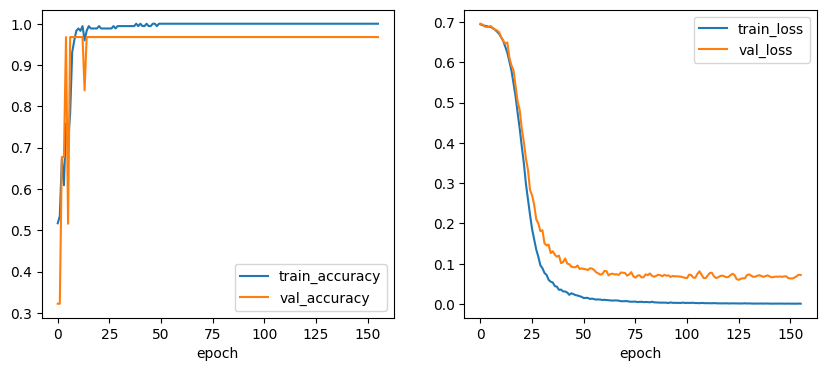

In [5]:
train_loss = pd.DataFrame(model.history.history['loss'],columns = ['train_loss'])
val_loss = pd.DataFrame(model.history.history['val_loss'],columns = ['val_loss'])
train_accuracy = pd.DataFrame(model.history.history['accuracy'],columns = ['train_accuracy'])
val_accuracy = pd.DataFrame(model.history.history['val_accuracy'],columns = ['val_accuracy'])

accuracy = train_accuracy.join(val_accuracy)
loss = train_loss.join(val_loss)
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (10,4))
accuracy.plot(ax=axes[0])
axes[0].set_xlabel('epoch')

loss.plot(ax = axes[1])
axes[1].set_xlabel('epoch')

In [6]:
train_dense_results = model.evaluate(modelling_data.training_padded, np.asarray(modelling_data.y_train), verbose=2, batch_size=256)
test_dense_results = model.evaluate(modelling_data.testing_padded, modelling_data.y_test)
print(f'Train accuracy: {train_dense_results[1]*100:0.2f}')
print(f'Test accuracy: {test_dense_results[1]*100:0.2f}')

1/1 - 0s - loss: 0.0116 - accuracy: 0.9951 - 64ms/epoch - 64ms/step
1/1 [==============================] - 0s 62ms/step - loss: 0.5942 - accuracy: 0.6667
Train accuracy: 99.51
Test accuracy: 66.67


XGB

In [282]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [293]:
data_class  = DataClass(use_prediction=True,custom=True,use_enhanced=True)
data_class.create_dataset()
data = data_class.data_model
modelling_data = DataModel(data = data_class.data_model,
                           custom_test_index=data_class.enhanced_index,
                           custom = False
                           )
modelling_data.create_padding()
modelling_data.x_test

modifying features
['link', 'employer', 'occupation', 'name_sex', 'firstname_lower']
['link', 'employer', 'occupation', 'name_sex', 'firstname_lower_enhanced']
Shape of training tensor:  (162, 50)
Shape of testing tensor:  (70, 50)


113                                 prenom femme marie
69                      metages    prenom homme floris
57                               prenom femme juliette
218              Ch Labrye  Menseuvr prenom homme jean
104                   patron     prenom femme gilberte
                            ...                       
90        Crousiere  entiiiateur prenom homme françois
117                     sans pof    prenom femme marie
217                             prenom femme marceline
64                      fille  sp  prenom femme léonie
127    chef oabrienson  manoeuvre prenom homme gervais
Name: message, Length: 70, dtype: object

In [3]:

df = modelling_data.data
df


,message,label
0,prenom femme marie,0
1,ahef prenom homme louis,1
2,prenom femme marie,0
3,prenom femme marie,0
4,prenom femme marguerite,0
...,...,...
236,sans mof gihromille,0
237,fils prenom homme alexandre,1
238,femme prenom femme marguerite,0
239,prenom homme etienne,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords

In [9]:
# Convert text data into numerical features using TF-IDF
final_stopwords_list = stopwords.words('french')
vectorizer = TfidfVectorizer(max_features=500,
                             min_df=0.2,
                             stop_words=final_stopwords_list,
                             use_idf=True,
                             ngram_range=(1,3))

# Assuming modelling_data.x_train and modelling_data.y_train are your training data and labels
X_train = vectorizer.fit_transform(modelling_data.x_train)
X_test = vectorizer.transform(modelling_data.x_test)

# Train the Gradient Boosting Classifier model
model = GradientBoostingClassifier(
  max_depth=10,
  learning_rate = 1e-4,
  criterion = "squared_error"
)
model.fit(X_train, modelling_data.y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(modelling_data.y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 62.96%


In [216]:

import spacy
nlp = spacy.load('fr_core_news_sm')

In [221]:
modelling_data = DataModel(data = data_class.data_model)
modelling_data.create_padding()
df = modelling_data.data
texts_train, texts_test, labels_train, labels_test = train_test_split(df['message'], df['label'],test_size=0.33)
# Function to tokenize sentences using spacy
def tokenize_sentences(sentence):
    doc = nlp(sentence)
    tokens = [token.text for token in doc if not token.is_stop]
    return ' '.join(tokens)

# Apply tokenization to your text data
texts_train_tokenized = texts_train.apply(tokenize_sentences)
texts_test_tokenized = texts_test.apply(tokenize_sentences)

# Vectorization (as before but with tokenized texts)
X_train = vectorizer.fit_transform(texts_train_tokenized)
X_test = vectorizer.transform(texts_test_tokenized)

# Tuning XGBoost parameters
model = xgb.XGBClassifier(
    n_jobs=-1,
    n_estimators=100,  # Example adjustment
    max_depth=5,       # Example adjustment
    learning_rate=0.2, # Example adjustment
    subsample=0.8,     # Example adjustment
    colsample_bytree=0.8, # Example adjustment
    booster = "gbtree"
)

# Proceed as before with model training and evaluation
model.fit(X_train, labels_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Shape of training tensor:  (162, 50)
Shape of testing tensor:  (70, 50)
Accuracy: 97.40%


In [177]:
"""Implement our NLP-based Recommendation Engine"""
from typing import List
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer


In [299]:
freq_name[freq_name['total']>250]['firstname'].unique()

array(['marie', 'jean', 'pierre', ..., 'thiébault', 'ursuline',
       'toussaine'], dtype=object)